# Plot the Data From Simulated and Actual Strains

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA,PLSRegression
from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Predicted_Data2.csv')
df = df.set_index(['Strain','Time'])
print(df.columns)
display(df)


Index(['AtoB', 'HMGS', 'HMGR', 'MK', 'PMK', 'PMD', 'Idi', 'GPPS', 'LS',
       'Limonene', 'Limonene.1'],
      dtype='object')


,,AtoB,HMGS,HMGR,MK,PMK,PMD,Idi,GPPS,LS,Limonene,Limonene.1
Strain,Time,,,,,,,,,,,
40,69,6.907890e+06,1.426564e+06,1.145128e+06,7.955059e+06,3.628873e+06,9.632836e+06,7.588655e+06,4.582779e+06,6.204650e+06,0.038691,0.030537
61,69,9.264788e+06,6.276168e+06,7.411510e+06,3.330180e+06,3.689115e+06,7.551776e+06,8.844604e+06,1.215289e+06,8.006737e+06,0.048479,0.031163
184,69,8.511733e+06,9.128302e+06,3.132927e+06,4.330861e+06,3.093317e+06,7.656567e+06,8.700119e+06,4.078600e+06,1.960104e+06,0.013244,0.018303
381,69,1.347616e+06,8.525119e+06,7.688765e+06,8.201058e+06,9.499033e+06,3.629470e+06,5.045686e+06,6.964342e+06,5.084205e+06,0.033248,0.034230
444,69,6.676560e+06,6.442348e+06,8.646763e+06,5.338485e+06,8.514699e+06,8.453925e+06,6.006942e+06,5.016647e+06,6.201006e+06,0.039452,0.028581
483,69,4.856170e+06,1.488952e+06,6.849938e+06,2.950008e+06,6.142480e+06,9.312086e+06,2.582010e+06,4.423062e+06,9.368294e+06,0.055636,0.034522
534,69,4.983690e+06,3.486229e+06,1.018992e+06,8.654819e+06,6.196317e+06,4.837282e+06,7.887559e+06,9.723086e+06,2.288708e+06,0.015238,0.025257
576,69,8.014191e+06,4.052517e+06,2.418767e+06,3.114274e+06,3.351634e+06,1.108084e+06,1.628535e+06,3.627579e+06,6.241407e+06,0.040084,0.043465
593,69,4.500695e+06,9.301681e+06,1.792244e+06,5.804859e+06,3.951381e+06,1.664858e+06,1.251203e+06,8.408705e+06,7.091180e+06,0.044593,0.040623


In [3]:
#Define Variables
independent_vars = ['AtoB', 'HMGS', 'HMGR', 'MK', 'PMK', 'PMD', 'Idi', 'GPPS', 'LS']
actual_dependent_var = 'Limonene'
predicted_dependent_var = 'Limonene.1'

X = df[independent_vars]
y = df[actual_dependent_var]
y_p = df[predicted_dependent_var]

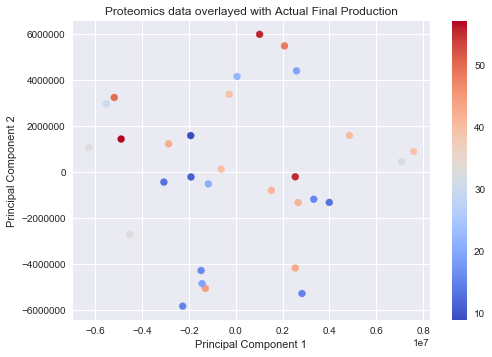

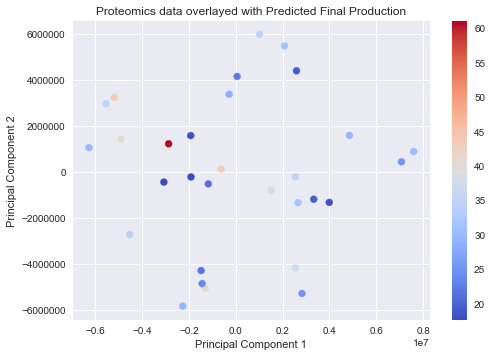

In [4]:
#Plot PCA of Actual and Predicted Limonene Production
#Plot PCA overlayed onto Predictions
pca = PCA(2)
X_pca = np.transpose(pca.fit_transform(X)).tolist()

#Scatter Plot PCA Fit
plt.figure()
plt.scatter(*X_pca,c=y*1000,cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar()
plt.title('Proteomics data overlayed with Actual Final Production')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show(block=False)

plt.figure()
plt.scatter(*X_pca,c=y_p*1000,cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar()
plt.title('Proteomics data overlayed with Predicted Final Production')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show(block=False)

,AtoB,HMGS,HMGR,MK,PMK,PMD,Idi,GPPS,LS
0,-0.375056,-0.097728,0.006105,-0.191370,-0.242279,-0.372951,-0.311785,0.021306,0.719491
1,-0.018472,0.426466,0.504339,-0.274686,0.446926,-0.259063,-0.421556,-0.077987,-0.193201


[[-4817686.2967096   -464593.94358515  6068656.91220365]
 [ -515916.17681457 -1109680.29952547 -1104907.44012808]]
[-4817686.2967096   -515916.17681457]
[ -464593.94358515 -1109680.29952547]
[ 6068656.91220365 -1104907.44012808]


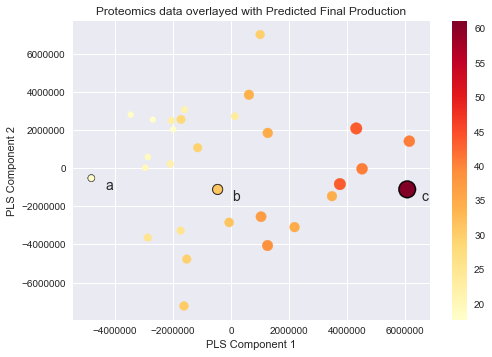

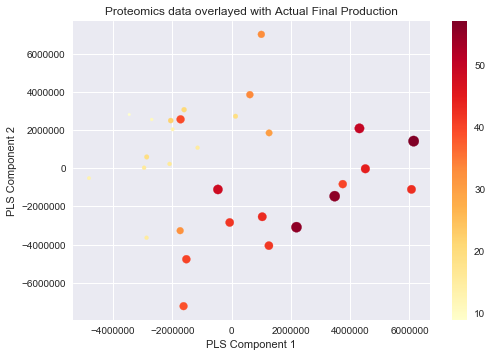

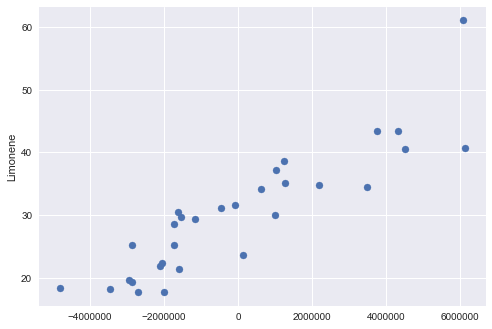

In [5]:
#Perform CCA on Data and Plot Overlay
cca = PLSRegression(2,scale=False)
X_cca,y_p_cca = cca.fit_transform(X,y_p)
#print(X_cca[:,0].shape)
X_cca = np.transpose(X_cca)
#print(y_p_cca.shape)
display(pd.DataFrame(np.transpose(cca.x_weights_),columns=independent_vars))

#print(y_p_cca)
#print(X_cca[0,:])
highlight_indecies = [2,1,28]
print(X_cca[:,highlight_indecies])

fig10 = plt.figure()
plt.scatter(*X_cca[:,highlight_indecies],color='k',s=y_p[highlight_indecies]**1.5*21000)
ax = plt.gca()
for point,label in zip(np.transpose(X_cca[:,highlight_indecies]),['a','b','c']):
    print(point)
    ax.annotate(label, ((point[0],point[1])),xytext=(point[0]+500000,point[1]),fontsize=14,horizontalalignment='left',verticalalignment='top')
    
plt.scatter(*X_cca,c=y_p*1000,cmap=plt.cm.get_cmap('YlOrRd'),s=y_p**1.5*15000)
plt.colorbar()

plt.title('Proteomics data overlayed with Predicted Final Production')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')

ax10a = plt.gca()

plt.figure()
plt.scatter(*X_cca,c=y*1000,cmap=plt.cm.get_cmap('YlOrRd'),s=y**1.5*8000)
plt.colorbar()
plt.title('Proteomics data overlayed with Actual Final Production')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
#plt.colorbar()
plt.show(block=False)

plt.figure()
plt.scatter(X_cca[0,:],y_p*1000)
plt.ylabel('Limonene')


,Strain,Time,AtoB,HMGS,HMGR,MK,PMK,PMD,Idi,GPPS,LS,Limonene,Limonene.1
14,1695,69,8.545967e+06,5.814882e+06,7.037930e+06,1.500064e+06,4.692622e+06,1.476436e+06,8.853705e+06,8.262933e+06,1.944062e+06,0.013125,0.017688
9,799,69,5.439757e+06,5.212274e+06,8.349765e+06,8.606814e+06,6.513024e+06,3.878199e+06,5.522402e+06,6.070845e+06,1.620939e+06,0.010894,0.017717
21,2760,69,5.986143e+06,1.238745e+06,9.345558e+06,9.520145e+06,9.218488e+06,4.939704e+06,3.983188e+06,7.594068e+06,1.293810e+06,0.008986,0.018213
2,184,69,8.511733e+06,9.128302e+06,3.132927e+06,4.330861e+06,3.093317e+06,7.656567e+06,8.700119e+06,4.078600e+06,1.960104e+06,0.013244,0.018303
26,3223,69,6.478862e+06,3.713886e+06,7.689692e+06,6.741064e+06,4.605752e+06,9.413188e+06,3.893201e+06,2.022730e+06,2.873282e+06,0.019183,0.019306
18,2274,69,9.445145e+06,7.000145e+06,1.723971e+06,4.232324e+06,4.069046e+06,5.997738e+06,4.407326e+06,3.882040e+06,2.343844e+06,0.015850,0.019609
25,3128,69,9.112340e+06,6.463935e+06,4.357980e+06,3.761036e+06,7.146375e+06,3.079882e+06,3.886972e+06,4.665496e+06,3.100936e+06,0.020745,0.021310
22,2773,69,3.218649e+06,5.647929e+06,2.350532e+06,2.755793e+06,8.701071e+06,3.877637e+06,9.727992e+06,6.604524e+06,2.397677e+06,0.016023,0.021877
15,1934,69,8.898530e+06,2.014512e+06,5.802222e+06,2.876691e+06,8.370896e+06,6.353958e+06,2.979956e+06,2.123714e+06,3.302631e+06,0.021995,0.022266
27,3234,69,1.204087e+06,8.833594e+06,1.396059e+06,3.228825e+06,8.282654e+06,5.447290e+06,3.120644e+06,4.399007e+06,2.882832e+06,0.019128,0.023632


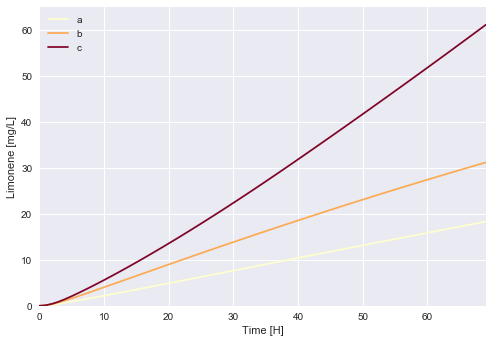

In [6]:

tsdf = pd.read_csv('FullTimeSeriesPredicted.csv')
display(df.reset_index().sort_values('Limonene.1'))
#Strains To Plot
strains_to_plot = [184,61,3276]
colors = ['#FFFECE','#FCAB53','#7E0428']
fig10b = plt.figure()
for color,strain in zip(colors,strains_to_plot):
    strain_df = tsdf.loc[tsdf['Strain']==strain]
    plt.plot(strain_df['Time'],strain_df['Limonene']*1000,color=color)
    
plt.xlim([0,69])
plt.ylim([0,65])
plt.xlabel('Time [H]')
plt.ylabel('Limonene [mg/L]')
plt.legend(['a','b','c'])

[-4817686.2967096   -515916.17681457]
[ -464593.94358515 -1109680.29952547]
[ 6068656.91220365 -1104907.44012808]


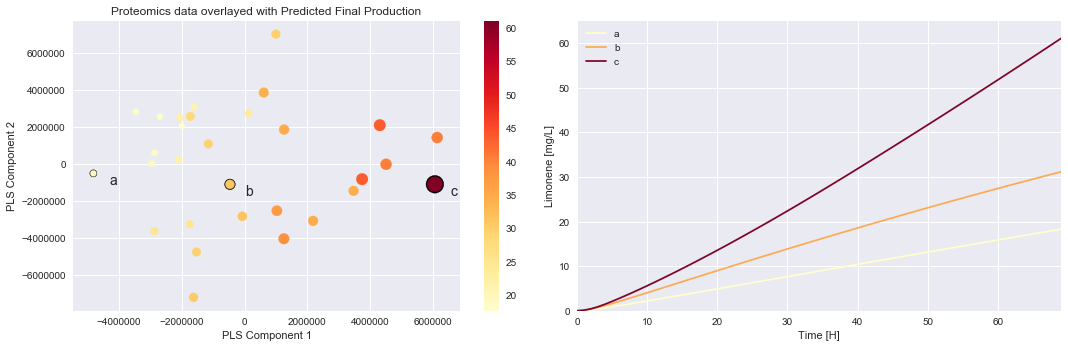

In [7]:
#Build Figure 10 For the Paper!
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

#Left Plot
plt.scatter(*X_cca[:,highlight_indecies],color='k',s=y_p[highlight_indecies]**1.5*21000)
ax = plt.gca()
for point,label in zip(np.transpose(X_cca[:,highlight_indecies]),['a','b','c']):
    print(point)
    ax.annotate(label, ((point[0],point[1])),xytext=(point[0]+500000,point[1]),fontsize=14,horizontalalignment='left',verticalalignment='top')
    
plt.scatter(*X_cca,c=y_p*1000,cmap=plt.cm.get_cmap('YlOrRd'),s=y_p**1.5*15000)
plt.colorbar()

plt.title('Proteomics data overlayed with Predicted Final Production')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')

plt.subplot(1,2,2)
for color,strain in zip(colors,strains_to_plot):
    strain_df = tsdf.loc[tsdf['Strain']==strain]
    plt.plot(strain_df['Time'],strain_df['Limonene']*1000,color=color)
    
plt.xlim([0,69])
plt.ylim([0,65])
plt.xlabel('Time [H]')
plt.ylabel('Limonene [mg/L]')
plt.legend(['a','b','c'])

plt.tight_layout()
plt.savefig('figures/fig10.png',dpi = 300)
plt.show()